In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Lebanon_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,1617,4,269.1,5223
1,1992,NaN,1965,5,275.8,6012
2,1993,NaN,2598,4,283.6,637
3,1994,NaN,3062,5,290.8,1359
4,1995,NaN,3665,5,296.5,1867


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,2003.500000,2.615667,6306.307692,17.153846,382.003846,1.714940e+05
std,7.648529,0.078099,2848.971418,9.946627,94.649693,3.741637e+05
min,1991.000000,2.459000,1617.000000,4.000000,269.100000,6.370000e+02
25%,1997.250000,2.597000,5128.250000,5.750000,302.825000,2.559500e+03
50%,2003.500000,2.620000,5488.500000,21.000000,369.700000,4.697500e+03
75%,2009.750000,2.639000,8726.000000,25.750000,420.225000,5.039400e+04
max,2016.000000,2.752000,11295.000000,33.000000,587.200000,1.154050e+06


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)


In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

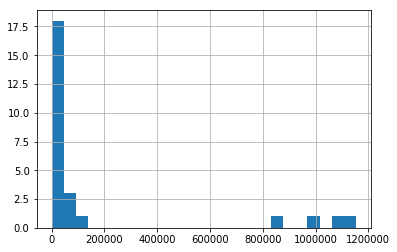

In [7]:
#check population histogram
df['Population'].hist(bins=25)

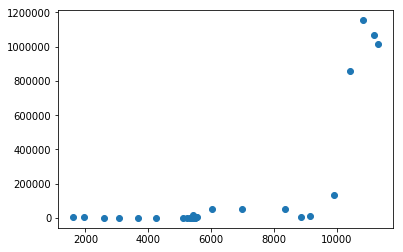

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

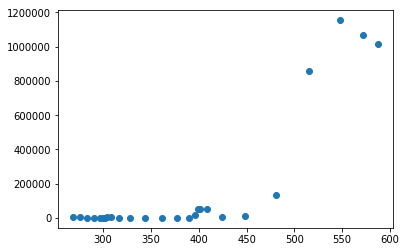

In [9]:
#check relationship between Density and Population
import matplotlib.pyplot as plt
plt.scatter(df['Density'], df['Population'])
plt.show() 

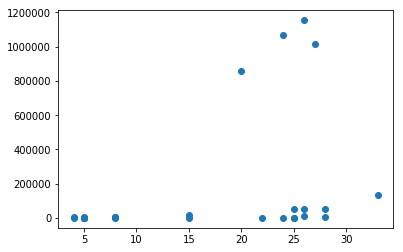

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

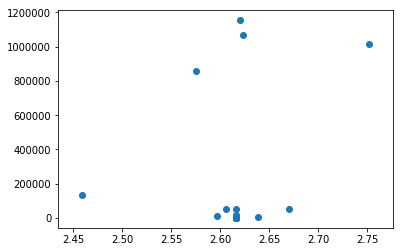

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -435058.216113
Coefficient:  [ 96.18183027]
R squared value:  0.536338616345


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -1076431.25305
Coefficient:  [ 3266.78714262]
R squared value:  0.682899670198


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -59462.0524352
Coefficient:  [ 13463.80574734]
R squared value:  0.128104424307


In [15]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -5050240.12184
Coefficient:  [ 1996330.10902533]
R squared value:  0.0555630063712


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  175438.413994
MAE Score:  139808.706605
MSE Score:  30778637104.9
R squared value:  0.84242051418


In [17]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  210678.713303
MAE Score:  184647.371981
MSE Score:  44385520239.2
R squared value:  0.703443237618


In [18]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  177303.674585
MAE Score:  130713.27212
MSE Score:  31436593021.3
R squared value:  0.836117069688


In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.91709166366
Predicted GDP for year:  2017 [[ 10983.97235577]]
Predicted GDP for year:  2018 [[ 11326.78104968]]
Predicted GDP for year:  2019 [[ 11669.58974359]]
Predicted GDP for year:  2020 [[ 12012.3984375]]
Predicted GDP for year:  2021 [[ 12355.20713141]]
Predicted GDP for year:  2022 [[ 12698.01582532]]


array([[ 10641.16366186]])

In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.911649228373
Predicted Density for year:  2017 [[ 548.468218]]
Predicted Density for year:  2018 [[ 560.67128008]]
Predicted Density for year:  2019 [[ 572.87434217]]
Predicted Density for year:  2020 [[ 585.07740425]]
Predicted Density for year:  2021 [[ 597.28046634]]
Predicted Density for year:  2022 [[ 609.48352842]]


array([[ 536.26515591]])

In [21]:
#predict the No of Country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.737391976315
Predicted No of country for year:  2017 [[ 32.76477198]]
Predicted No of country for year:  2018 [[ 33.9091207]]
Predicted No of country for year:  2019 [[ 35.05346943]]
Predicted No of country for year:  2020 [[ 36.19781815]]
Predicted No of country for year:  2021 [[ 37.34216687]]
Predicted No of country for year:  2022 [[ 38.48651559]]


array([[ 31.62042326]])

In [22]:
# Forecasted Population of Lebanon
X = df[['GDP','Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
    

    
var_2017 = [[10983.97235577,548.468218,32.76477198]]
var_2018 = [[11326.78104968,560.67128008,33.9091207]]
var_2019 = [[11669.58974359,572.87434217,35.05346943]]                               
var_2020 = [[12012.3984375,585.07740425,36.19781815]]
var_2021 = [[12355.20713141,597.28046634,37.34216687]]
var_2022 = [[12698.01582532,609.48352842,38.48651559]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 691020.89898337]
Predicted Population for year 2018:  [ 727910.8981766]
Predicted Population for year 2019:  [ 764800.89719746]
Predicted Population for year 2020:  [ 801690.89639069]
Predicted Population for year 2021:  [ 838580.89564024]
Predicted Population for year 2022:  [ 875470.89483347]


In [23]:
lm2.predict([[10641.16366186,536.26515591,31.62042326]])

array([ 654130.89973381])

In [24]:
# Forecasted Population of Lebanon
X = df[['GDP','Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
    

    
var_2017 = [[10983.97235577,548.468218]]
var_2018 = [[11326.78104968,560.67128008]]
var_2019 = [[11669.58974359,572.87434217]]                               
var_2020 = [[12012.3984375,585.07740425]]
var_2021 = [[12355.20713141,597.28046634]]
var_2022 = [[12698.01582532,609.48352842]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 744209.81141631]
Predicted Population for year 2018:  [ 784966.76891785]
Predicted Population for year 2019:  [ 825723.72646919]
Predicted Population for year 2020:  [ 866480.68397073]
Predicted Population for year 2021:  [ 907237.64152207]
Predicted Population for year 2022:  [ 947994.5990236]


In [25]:
lm2.predict([[10641.16366186,536.26515591]])

array([ 703452.85386497])